In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from astropy.coordinates import Distance
from scipy.optimize import leastsq

import astropy.units as u
import astropy.constants as const
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.2)

### 2.3

In [2]:
dist = Distance(value=470*u.lightyear)
dist.distmod

<Quantity 5.79335991 mag>

In [3]:
mv = 2.8 * u.mag
Mv = mv - dist.distmod
Mv

<Quantity -2.99335991 mag>

In [4]:
Mbol = Mv - 3.16*u.mag
Mbol

<Quantity -6.15335991 mag>

In [5]:
L = 10**((Mbol.value - 4.74)/-2.5) * u.solLum
L

<Quantity 22769.00043849 solLum>

In [6]:
Teff = 3e4 * u.K
R = np.sqrt(L/(4*np.pi*const.sigma_sb * Teff**4)).to(u.solRad)
R

<Quantity 5.58576832 solRad>

In [7]:
M = (L.value / 12)**(1/2.9) * u.solMass
M

<Quantity 13.50208811 solMass>

In [8]:
g = const.G * M / R**2
g.cgs

<Quantity 11865.95586017 cm / s2>

In [9]:
np.log10(g.cgs.value)

4.0743027284846445

In [10]:
vesc = np.sqrt(2*const.G*M/R)
vesc.cgs

<Quantity 96032630.01031251 cm / s>

In [11]:
rho = M/(4/3 * np.pi * R**3)
rho.cgs

<Quantity 0.10922393 g / cm3>

In [12]:
g_sol = const.G * u.solMass / (u.solRad**2)
g.cgs / g_sol.cgs

<Quantity 0.43274803>

In [13]:
vesc_sol = np.sqrt(2*const.G*u.solMass/u.solRad)
vesc.cgs / vesc_sol.cgs

<Quantity 1.55474443>

In [14]:
rho_sol = u.solMass/(4/3 * np.pi * u.solRad**3)
rho.cgs / rho_sol.cgs

<Quantity 0.07747332>

### 4.3

In [15]:
df = pd.read_csv('http://www.ap.smu.ca/~guenther/evolution/ssmyz47_0200.txt',
                 delim_whitespace=True, skiprows=24,
                 names=['SHELL','Radius Frac','Mass Frac',
                        'Radius','Mass','Luminosity',
                        'Temperature [K]','Density [g/cm3]'])[::5]
                 #names=['R','M','L','logT [K]','logP []','logRho','mu','dTdR','dTdR_ad','equil'])[::5]

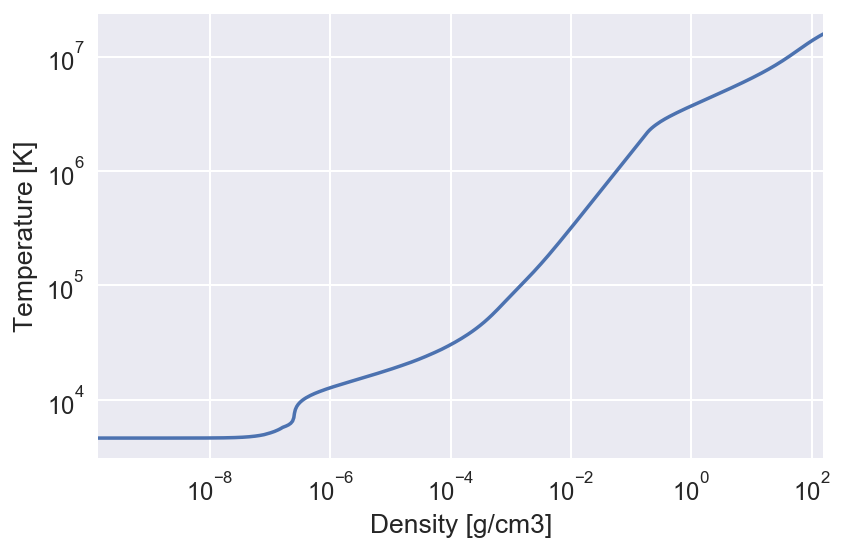

In [16]:
ax = df.plot('Density [g/cm3]','Temperature [K]')
ax.set_xscale('log')
ax.set_yscale('log')
ax.invert_xaxis()
ax.legend_.remove()
ax.set_ylabel('Temperature [K]')
sns.mpl.pyplot.tight_layout()
sns.mpl.pyplot.savefig('temp_density.jpg', dpi=144)

### 5.2

In [17]:
N = (u.solRad / u.cm)**2
N.decompose()

Unit(dimensionless with a scale of 4.8399849e+21)

In [18]:
path_length = N.decompose() * u.cm
(path_length / const.c).decompose().to(u.year)

<Quantity 5115.86807597 yr>

### 6.2

106.01394036620934 2.0666872891409267


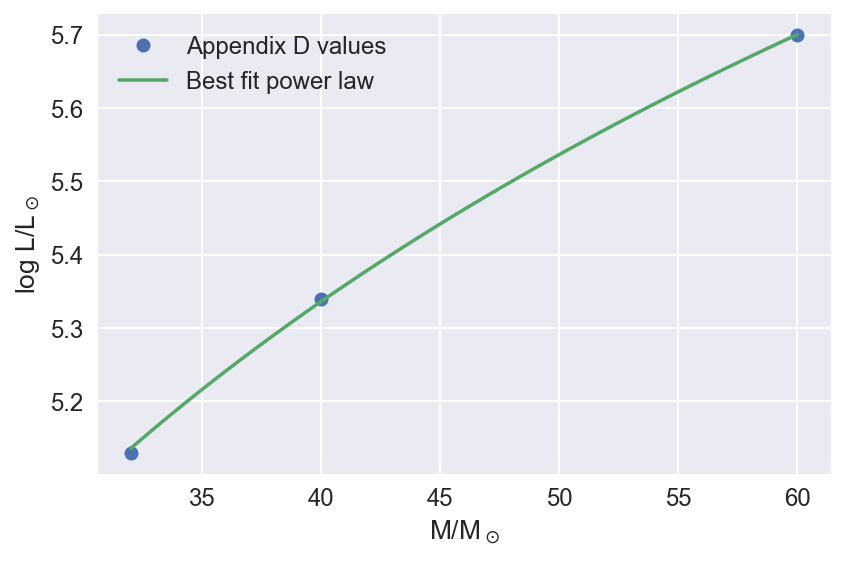

In [19]:
# mass-luminosity relation for ZAMS stars 30-60 solmass
masses = np.array([32,40,60])
logL = np.array([5.13,5.34,5.7])

errfunc = lambda p, x, y: y - p[0]*x**p[1] 
p0 = [12, 2.9] 
(coeff, exp), success = leastsq(errfunc, p0, args=(masses, 10**logL))
print(coeff, exp)

x = np.linspace(32,60,100)
fig, ax = sns.mpl.pyplot.subplots()
ax.plot(masses, logL, 'o', label='Appendix D values')
ax.plot(x, np.log10(coeff*(x**exp)), label='Best fit power law')
ax.legend()
ax.set_xlabel('M/M$_\odot$')
ax.set_ylabel('log L/L$_\odot$')
sns.mpl.pyplot.tight_layout()
sns.mpl.pyplot.savefig('powerlaw.jpg', dpi=144)

In [20]:
def calc_eddington(coeff, exp):
    Mmax = (3.8e4 / coeff)**(1/(exp - 1)) * u.solMass
    Lmax = 3.8e4 * (Mmax/u.solMass) * u.solLum
    return Mmax, Lmax

# check that it works for empirical ML relation
calc_eddington(*p0)

(<Quantity 69.57004588 solMass>, <Quantity 2643661.74348457 solLum>)

In [21]:
calc_eddington(coeff, exp)

(<Quantity 248.15500138 solMass>, <Quantity 9429890.05243432 solLum>)

### 7.2

In [22]:
def calc_mslifetime(log_Lstar, M_core):
    Lstar = 10**log_Lstar * u.solLum
    E_tot = 0.007 * M_core*u.solMass * const.c**2
    return (E_tot/Lstar).to(u.year)

# 4 solar mass star
calc_mslifetime(2.37, 1)

<Quantity 4.41757341e+08 yr>

In [23]:
# 20 solar mass star
calc_mslifetime(4.61, 10)

<Quantity 25420481.68459756 yr>

In [24]:
'{:.3e}'.format(10**8.18), '{:.3e}'.format(10**6.89)

('1.514e+08', '7.762e+06')